Co-authors Network Analysis
---------------------------

Following the temporal analysis in this notebook the network of co-authors will be studied.

By co authors we mean the people that have both been an author on the same article. One author can have more that one connection, for more that one article. 

Initial we will perform a clean up one the names and then the network of the co-authors will be created. An analysis on meseaures of the network itself will be carried out.

In this notebook:
- 3. Co-authors Network Analysis

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_json('data.json')

Clean up
--------

Here we must manually clean up the names. The issue with names is that there is more than one correct way a name can be writen.

*ex. Nikoleta Evdokia Glynatsi, Nikoleta E Glynatsi, N E Glynatsi, N Glynatsi.*

This issue could have not been avoided during the data collection because journals and the authors themsleves have different ways of writing one's name.

Initial all letter in the string author are lowercased.

In [3]:
df.author = df.author.str.lower()

Not many efficient ways for addressing the problem have been found. After a search on various ways of string comparison the Levenshtein distance has been chosen as a measure. The Levenshtein distance is a string metric for measuring the difference between two sequences. *wikipedia link: (https://en.wikipedia.org/wiki/Levenshtein_distance)*

To compute the difference in python the open source library fuzzywuzzy will be used (https://github.com/seatgeek/fuzzywuzzy).


*Example:*

```
>>> fuzz.token_set_ratio('n glynatsi','nikoleta glynatsi')
89
```

There will be errors with the current method. Some author names could have a high token set ratio ans still be the same. For example if only a letter is different between author names. We will keep this error in consideration.

In [4]:
from fuzzywuzzy import fuzz

/home/nightwing/anaconda3/envs/literature/lib/python3.6/site-packages/fuzzywuzzy/fuzz.py:35: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [5]:
for i in df.author.unique():
    for j in df.author.unique():
        ratio = fuzz.token_set_ratio(i,j)
        if ratio >=85 and ratio != 100:
            df.author = df.author.replace(j, i)

In [6]:
authors_df = df.groupby(['unique_key', 'author']).size().reset_index().groupby('author').size()

In [7]:
authors = [nm for nm in authors_df.index]

In [8]:
co_authors = []
for art in df.unique_key.unique():
    temp = df[df.unique_key == art]
    for auth in temp.author.unique():
        for other_auth in temp.author.unique():
            co_authors.append((auth, other_auth))

For creating and analysing the network the python library networkx will be used though out 
the notebook (https://networkx.github.io/).

In [9]:
G = nx.Graph()
G.add_nodes_from(authors)
G.add_edges_from(co_authors)

Illustrating co-authors network
------------------------

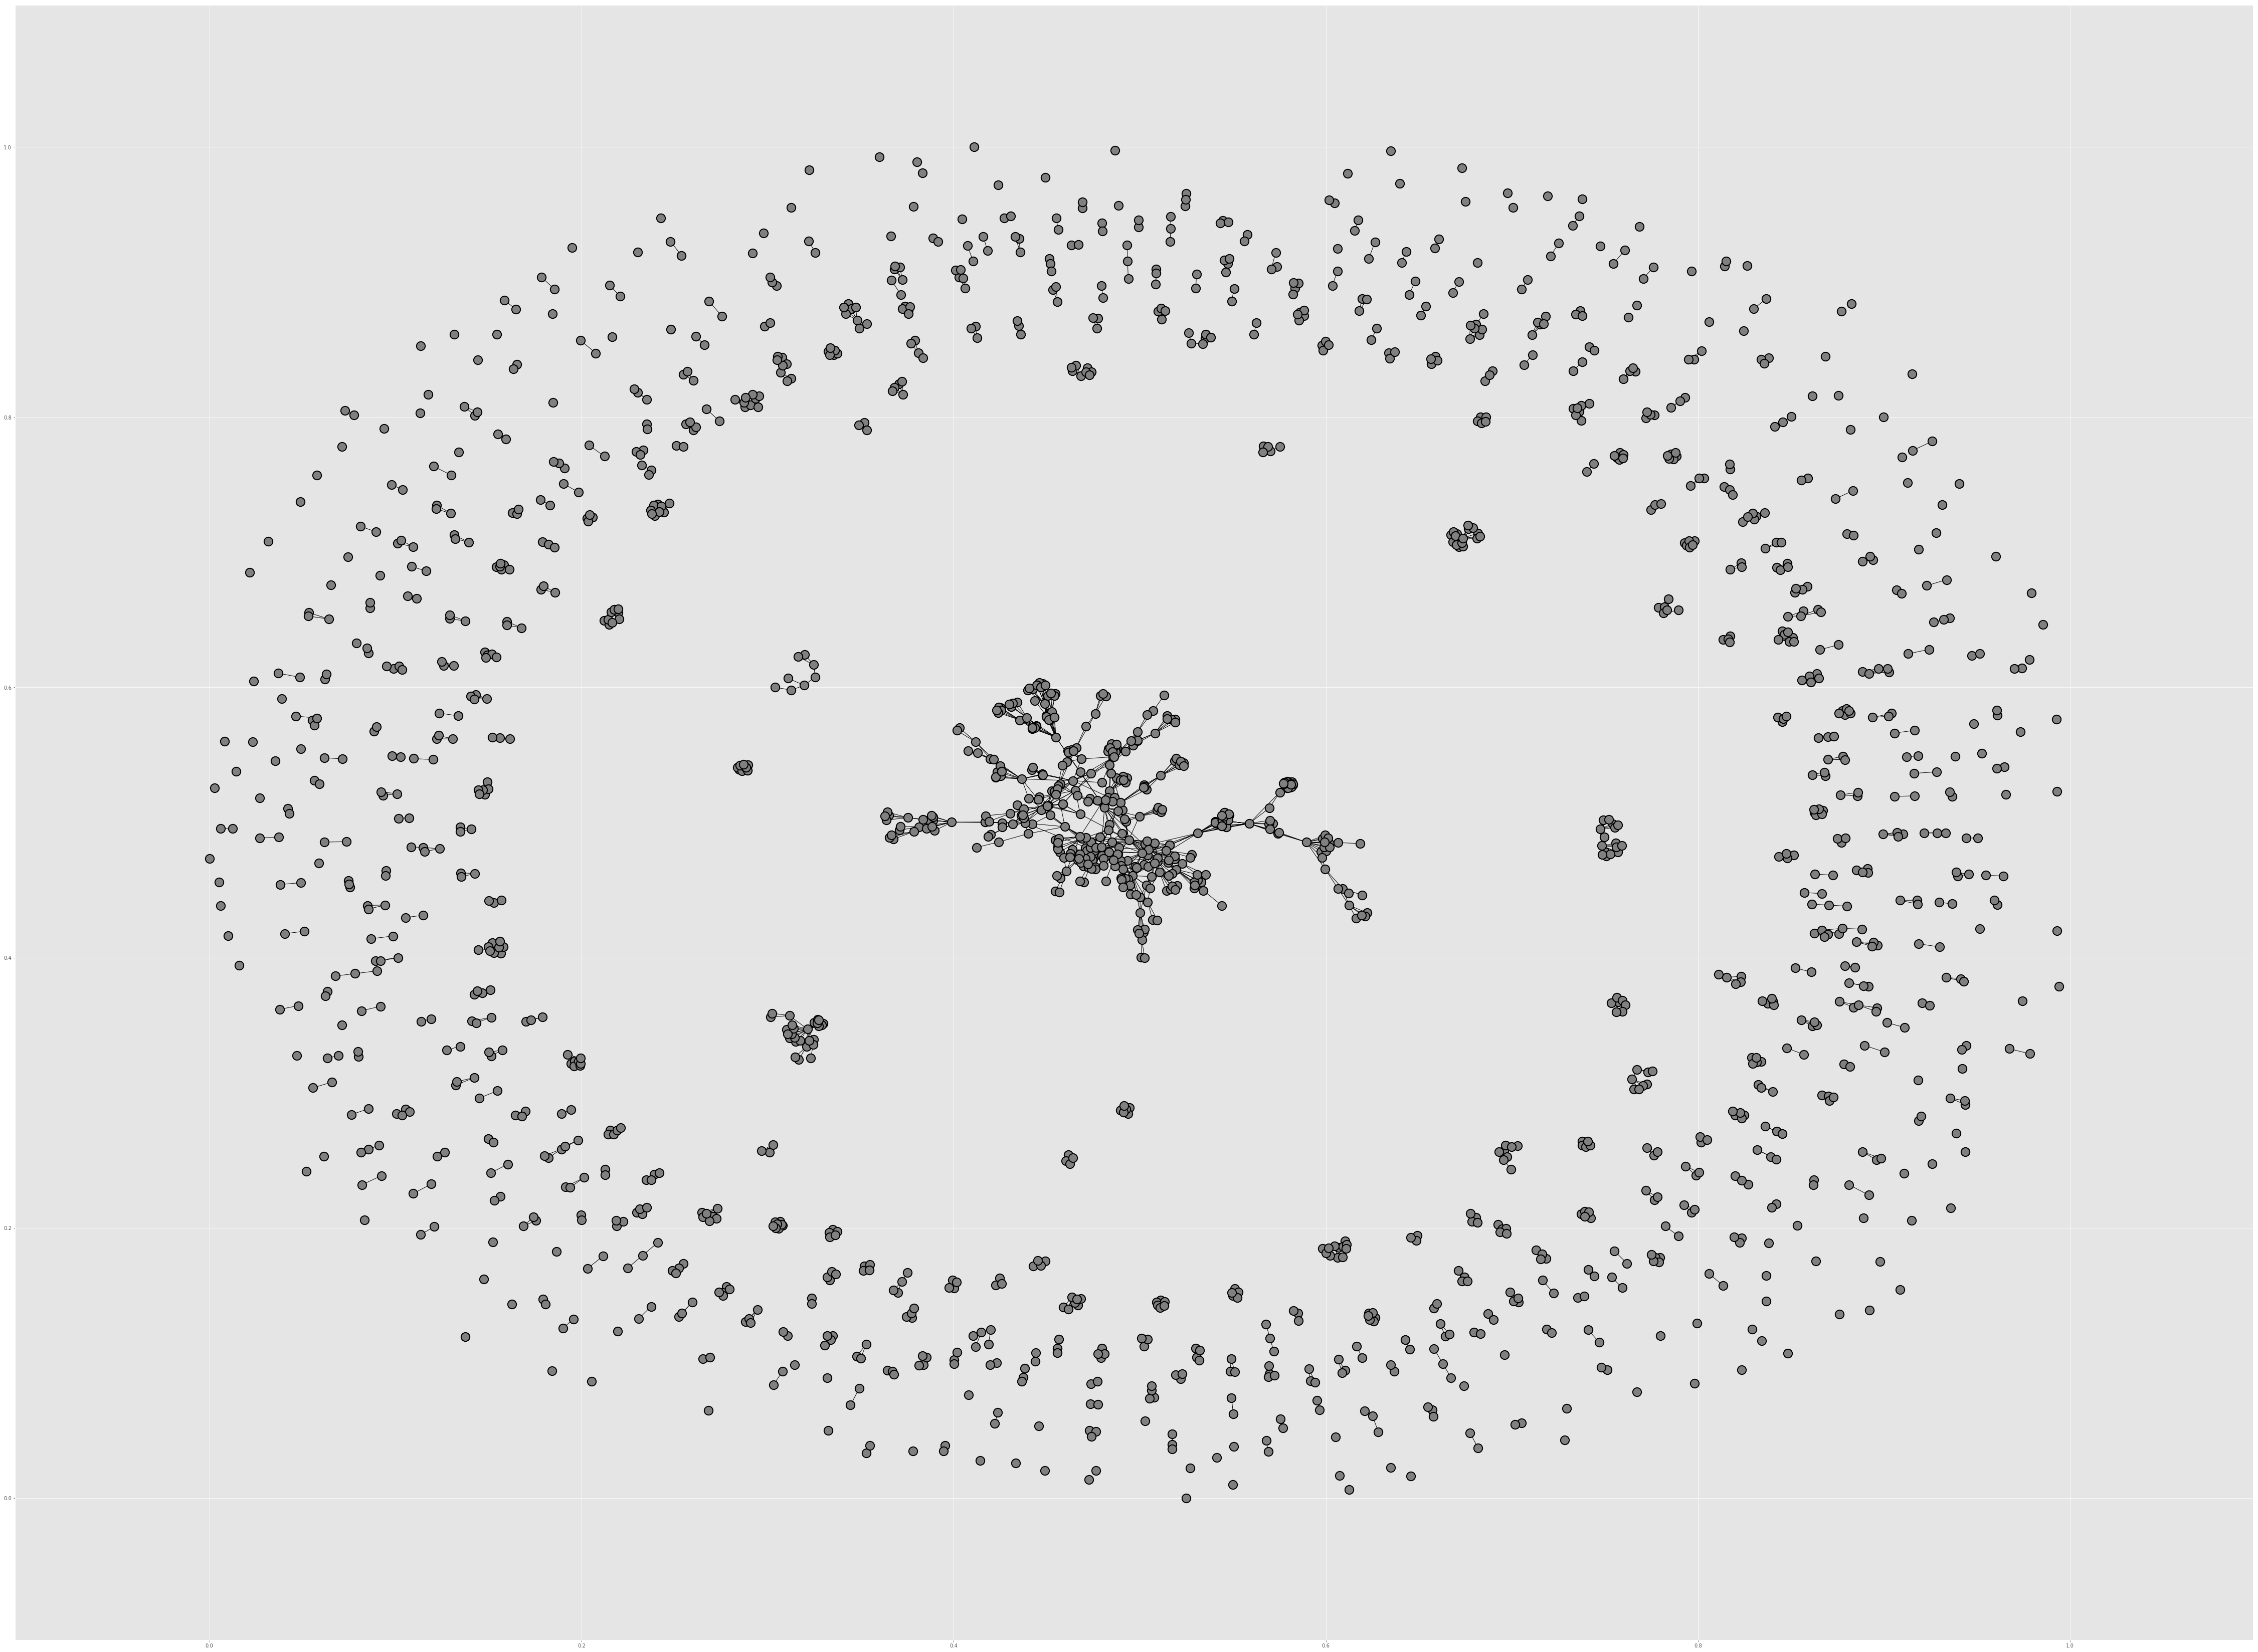

In [10]:
fig = plt.figure(figsize=(80, 60))

pos = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, linewidths=2, node_color='grey')
nodes.set_edgecolor('black'); nx.draw_networkx_edges(G, pos)

plt.show()
#plt.savefig("", format='pdf', bbox_inches='tight')

Analysing co-authors network
-----------------------------

In [11]:
import operator

**Clusters**

In [12]:
clusters = nx.clustering(G)
sorted_clusters = sorted(clusters.items(), key=operator.itemgetter(1))

In [13]:
sorted_clusters[-20:]

[('zhenhua pei', 1.0),
 ('zhenlei zhong', 1.0),
 ('zhi-gang chen', 1.0),
 ('zhigang cao', 1.0),
 ('zhihu yang', 1.0),
 ('zhijian wang', 1.0),
 ('zhipeng xu', 1.0),
 ('zhou  tao', 1.0),
 ('zhu  ping', 1.0),
 ('zhu  zongshan', 1.0),
 ('zhuozheng li', 1.0),
 ('zi-nan tang', 1.0),
 ('zichuan xu', 1.0),
 ('zoltan barta', 1.0),
 ('zsuzsa danku', 1.0),
 ('zubin bhagwagar', 1.0),
 ('ákos ludányi', 1.0),
 ('åke brännström', 1.0),
 ('élio sucena', 1.0),
 ('ümit v. çatalyürek', 1.0)]

**Centrality**

In graph theory and network analysis, indicators of centrality identify the most important vertices within a graph. 
*wikipedia link: https://en.wikipedia.org/wiki/Centrality*

We could illustrate these names on the graph.

In [31]:
degree_centrality = nx.degree_centrality(G)
sorted_degree_centrality = sorted(degree_centrality.items(), key=operator.itemgetter(1))

In [64]:
sorted_degree_centrality[-20:]

[('luis visintini', 0.011609498680738786),
 ('martin chorley', 0.011609498680738786),
 ('martin jones', 0.011609498680738786),
 ('müller jochen', 0.011609498680738786),
 ('nikoleta glynatsi', 0.011609498680738786),
 ('owen campbell', 0.011609498680738786),
 ('paul slavin', 0.011609498680738786),
 ('qing jin', 0.011609498680738786),
 ('thomas campbell', 0.011609498680738786),
 ('timothy standen', 0.011609498680738786),
 ('tomáš ehrlich', 0.011609498680738786),
 ('vincent knight', 0.011609498680738786),
 ('yamir moreno', 0.012137203166226913),
 ('yang  zhen', 0.012137203166226913),
 ('ying zhang', 0.012137203166226913),
 ('edval j. p. santos', 0.012664907651715039),
 ('marc harper', 0.012664907651715039),
 ('matjaž perc', 0.01424802110817942),
 ('a. sanchez', 0.015303430079155671),
 ('zhang jinlong', 0.017414248021108178)]

In [61]:
labels = {nm[0]: nm[0] for nm in sorted_degree_centrality[-3:]}

**Cliques**

A clique, in the social sciences, is a group of individuals who interact with one another and share similar interests.

- Text book: http://oxfordindex.oup.com/view/10.1093/acprof:oso/9780198506263.003.0006
- wikipedia link: https://en.wikipedia.org/wiki/Clique
- networkx: https://networkx.github.io/documentation/networkx-1.9.1/reference/algorithms.clique.html


In [86]:
number = nx.graph_clique_number(G)
max_number = nx.graph_number_of_cliques(G)

In [87]:
number, max_number

(21, 859)

In [74]:
cliques_G = nx.make_max_clique_graph(G)

In [76]:
pos = nx.spring_layout(cliques_G)

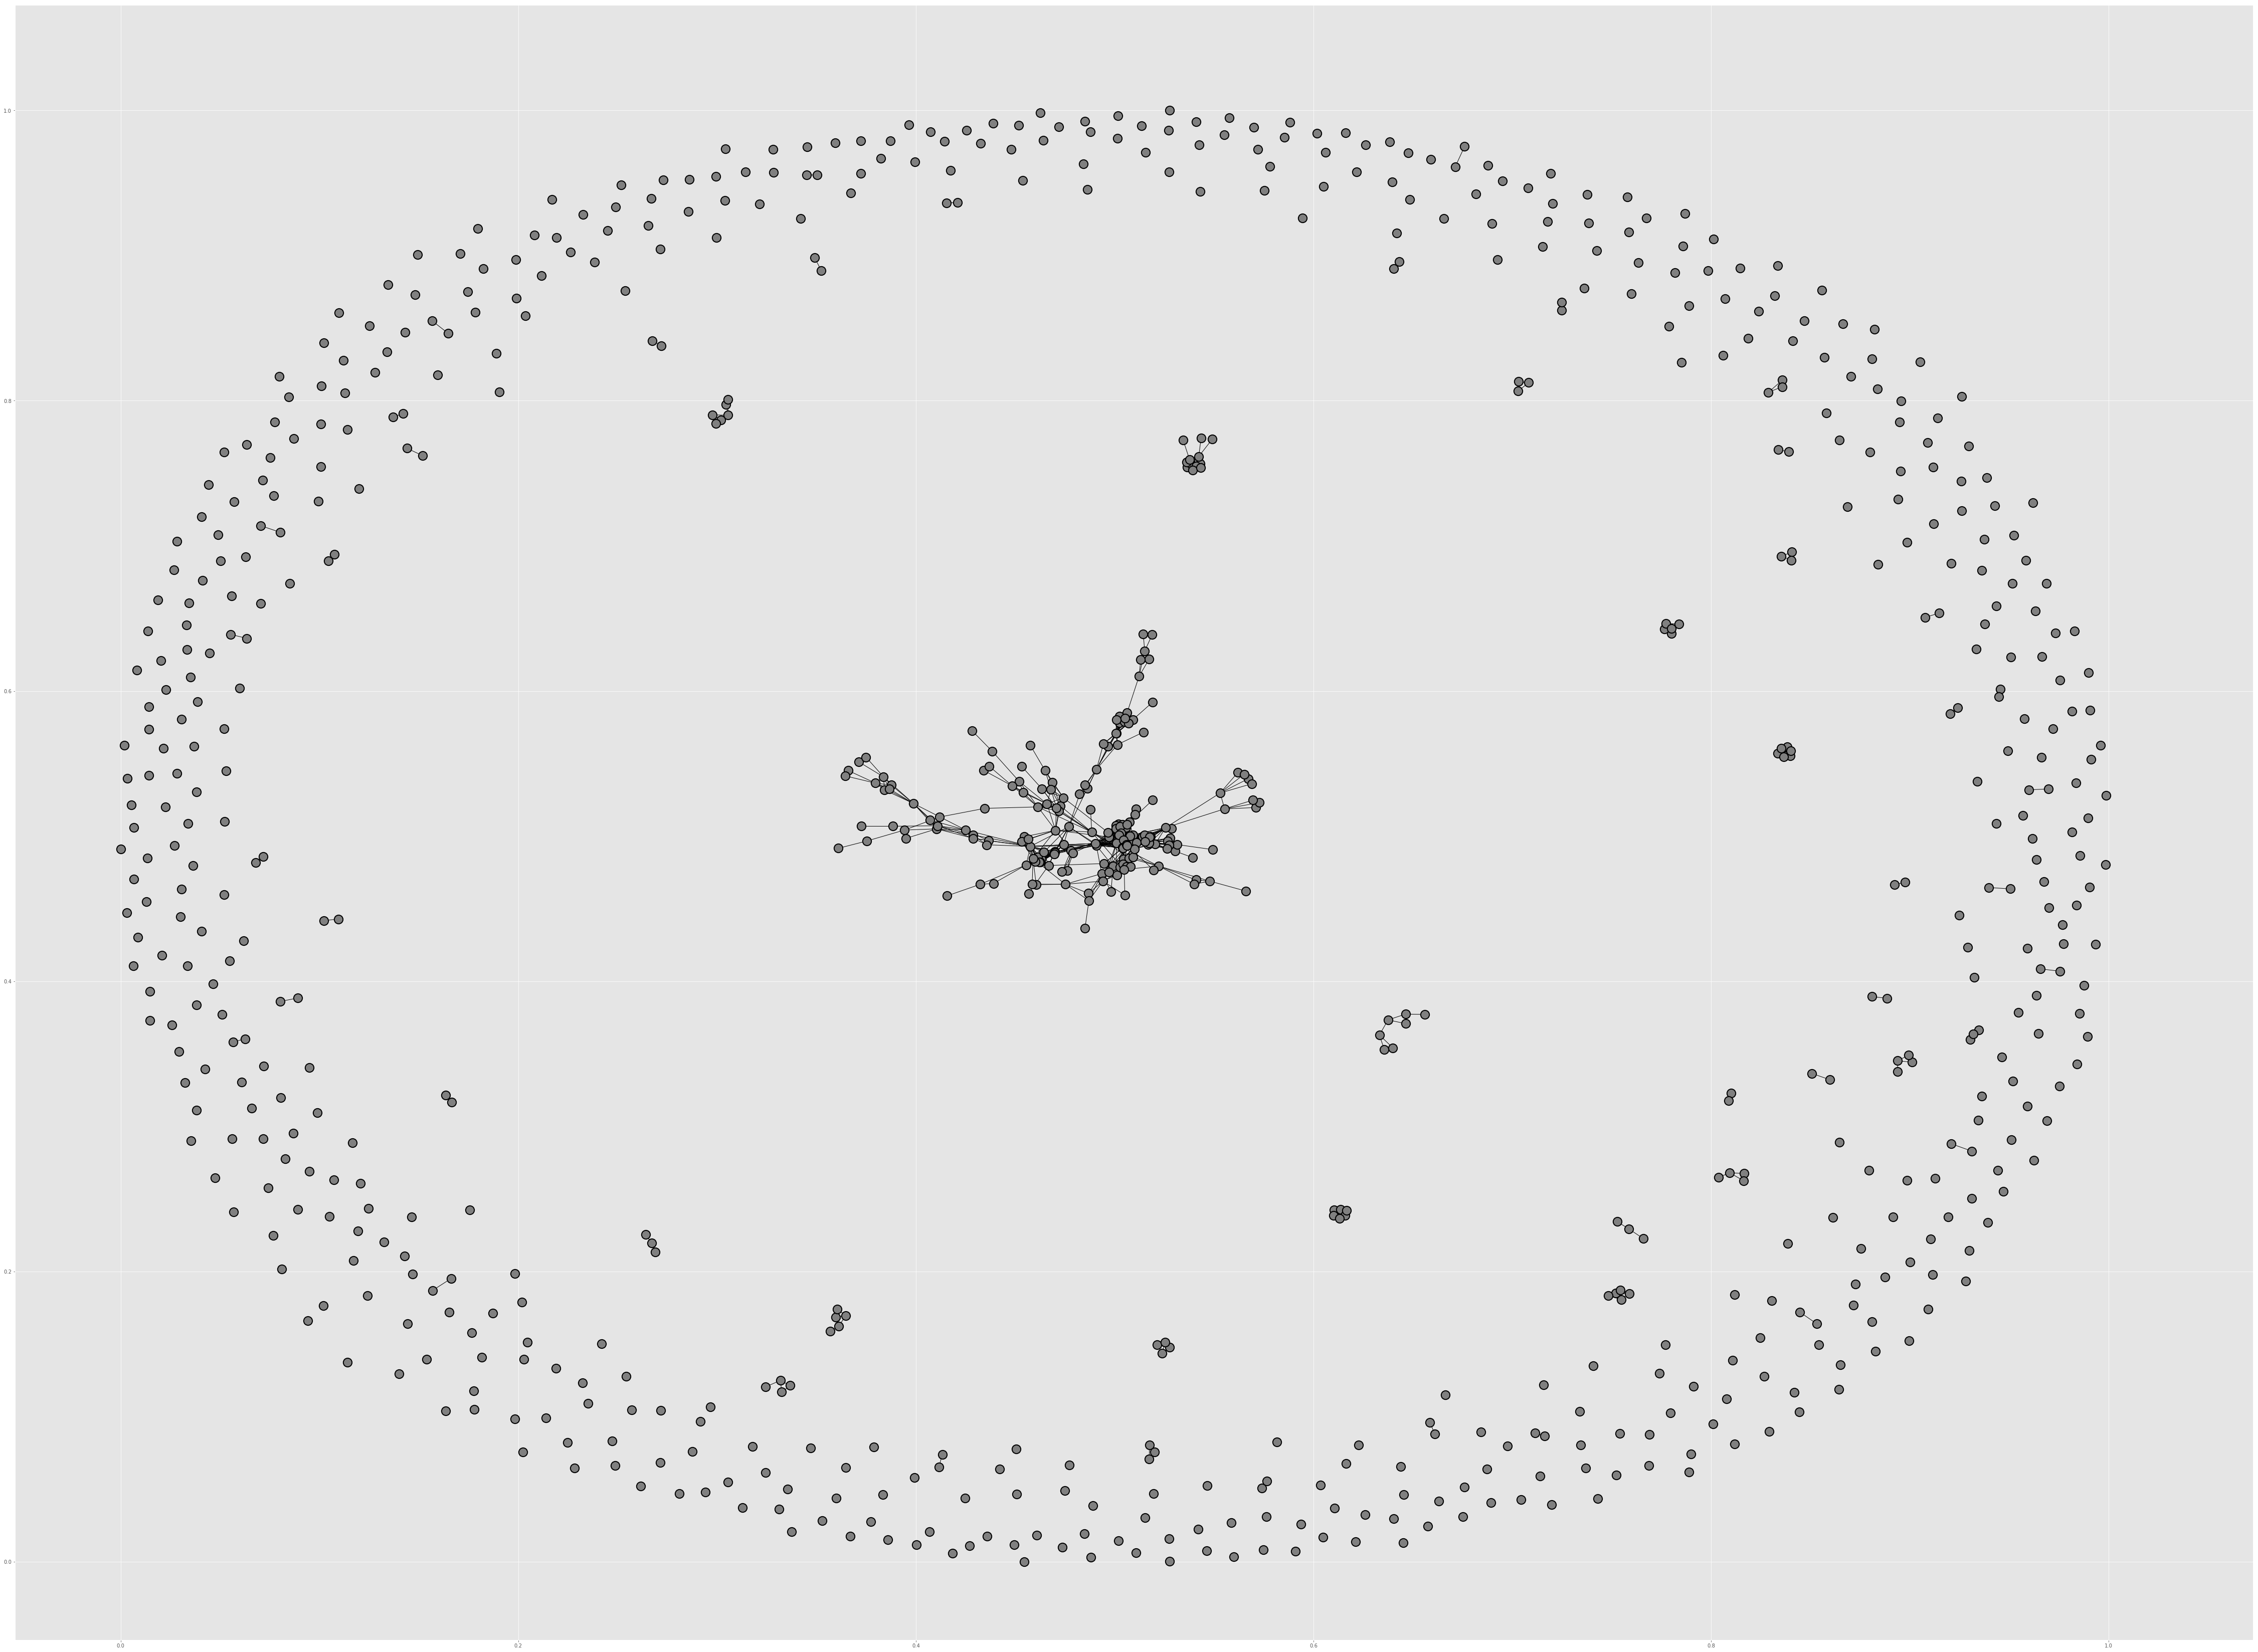

In [77]:
fig = plt.figure(figsize=(80, 60))

nodes = nx.draw_networkx_nodes(cliques_G, pos, linewidths=2, node_color='grey')
nodes.set_edgecolor('black'); nx.draw_networkx_edges(cliques_G, pos)

plt.show()

In [81]:
bipartite_G = nx.make_clique_bipartite(G)

In [83]:
pos = nx.spring_layout(bipartite_G)

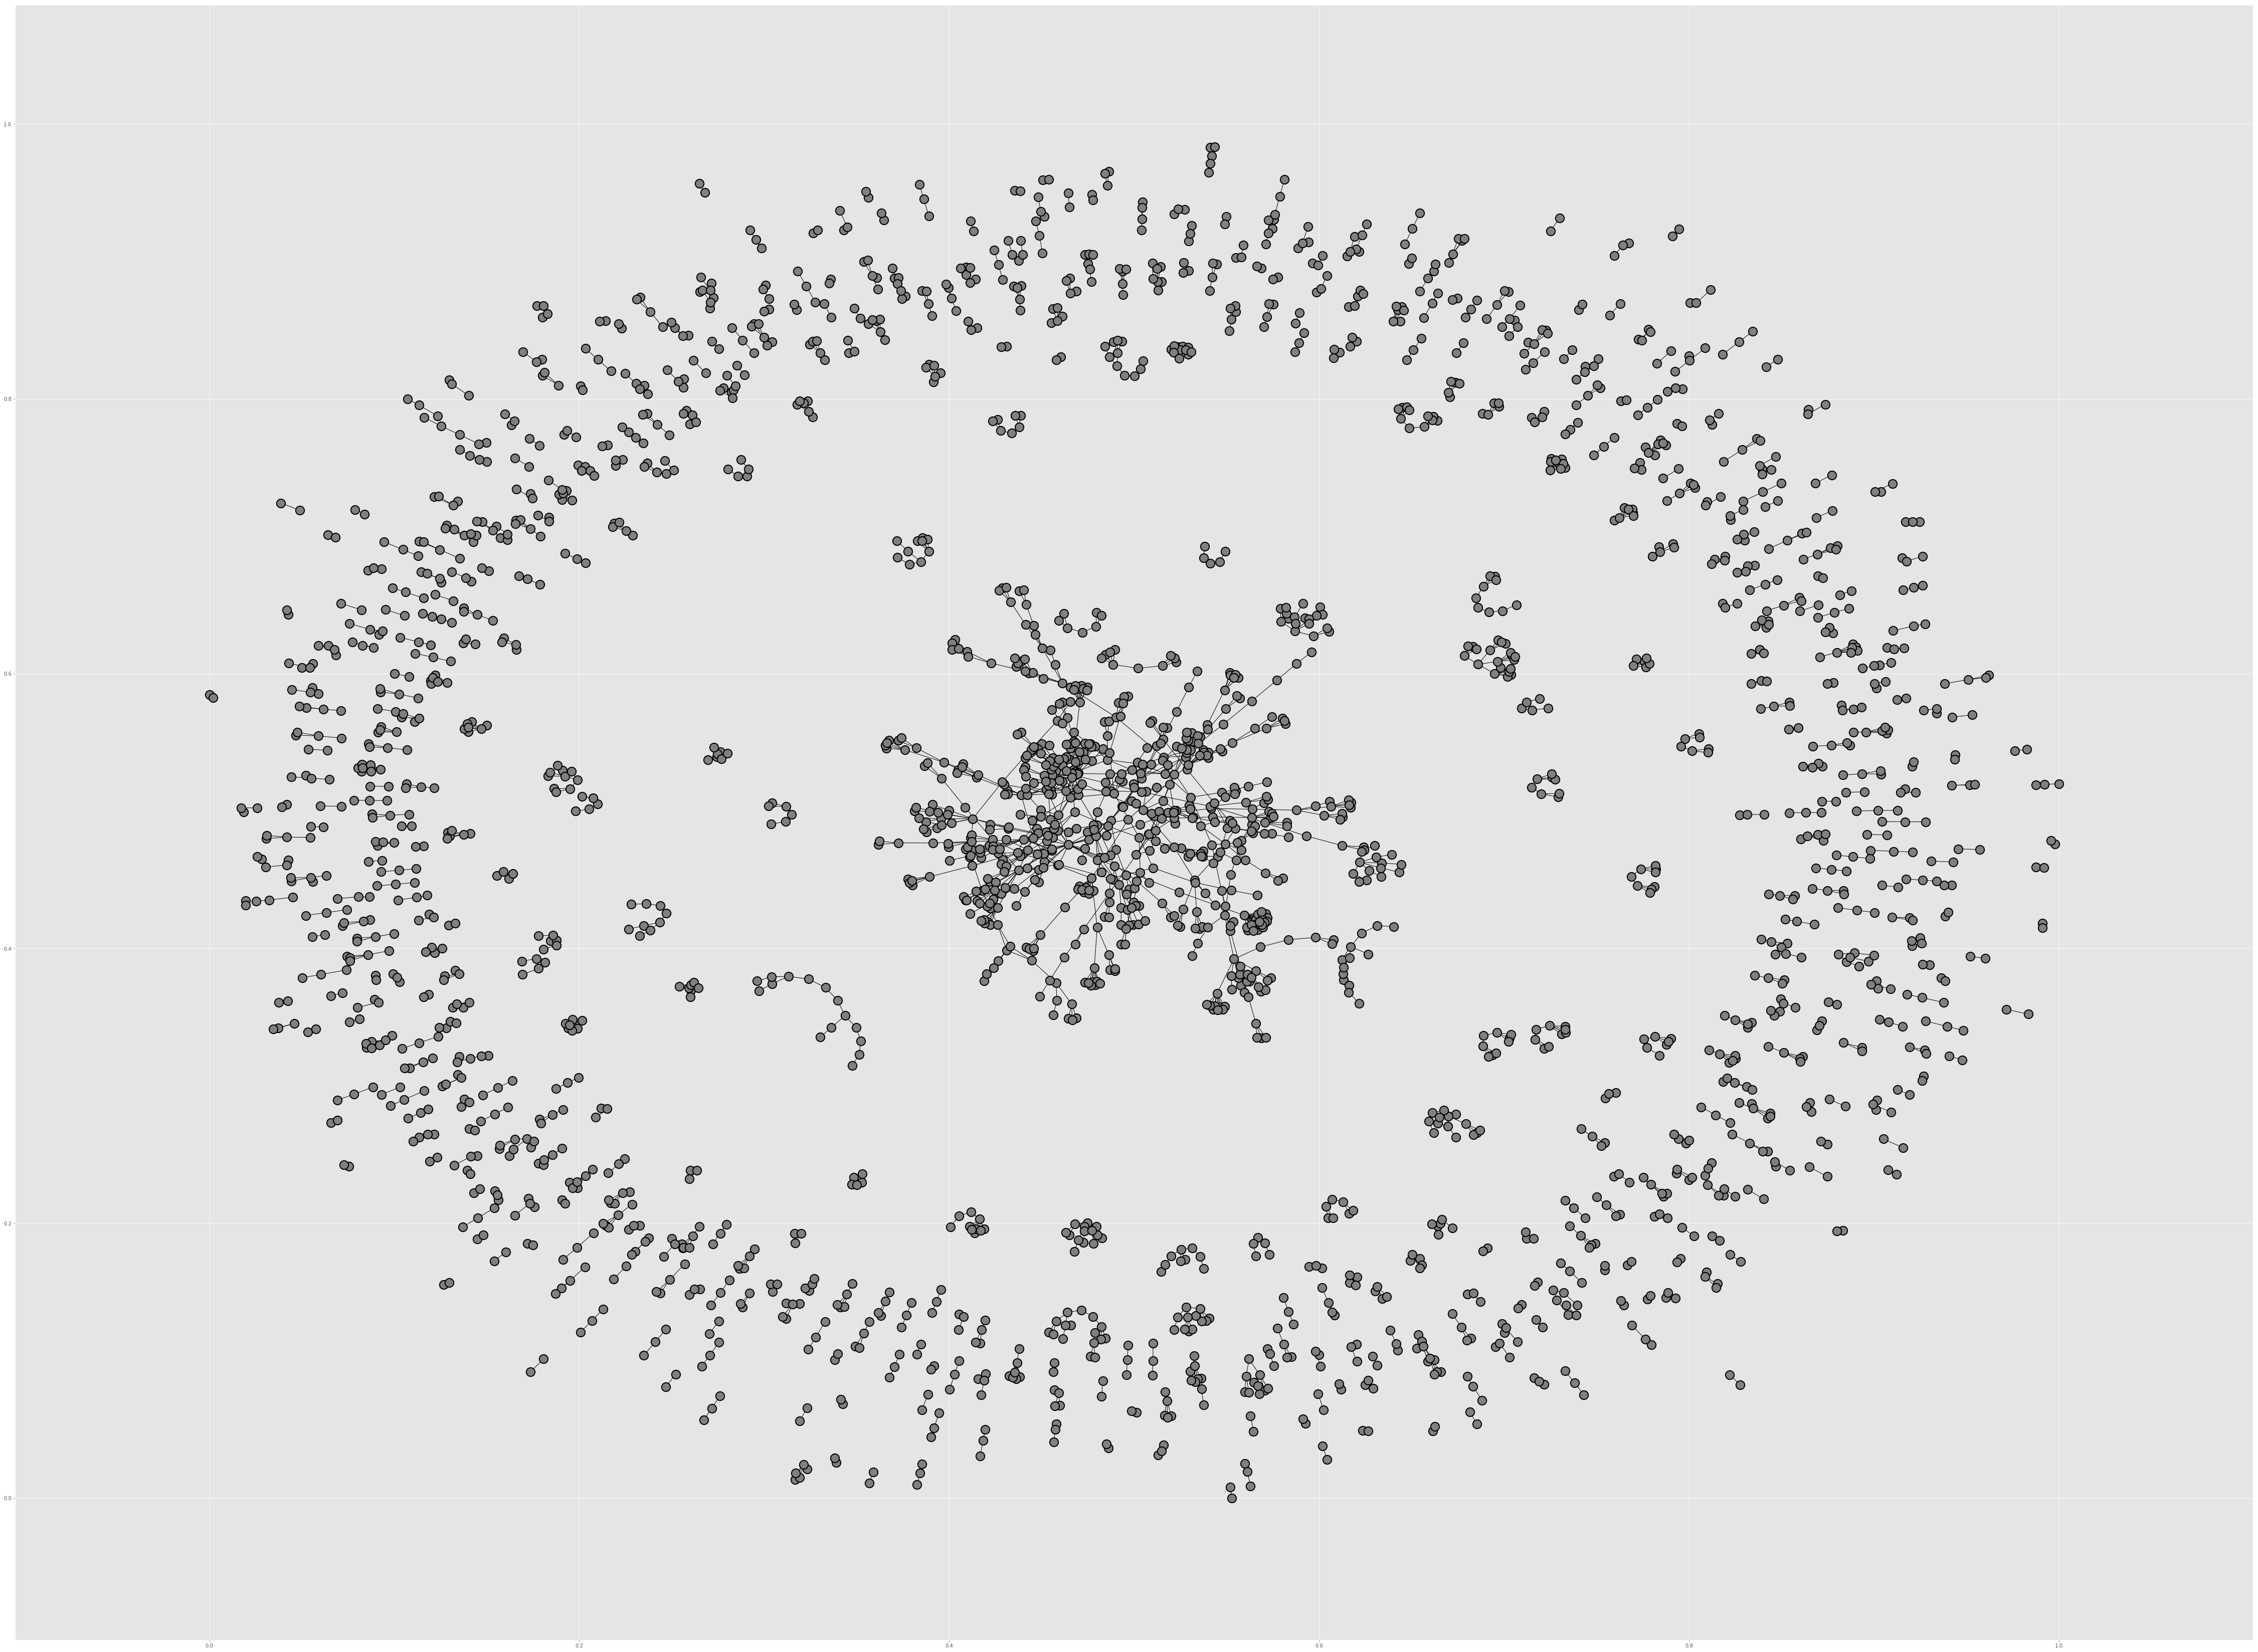

In [84]:
fig = plt.figure(figsize=(80, 60))

nodes = nx.draw_networkx_nodes(bipartite_G, pos, linewidths=2, node_color='grey')
nodes.set_edgecolor('black'); nx.draw_networkx_edges(bipartite_G, pos)

plt.show()